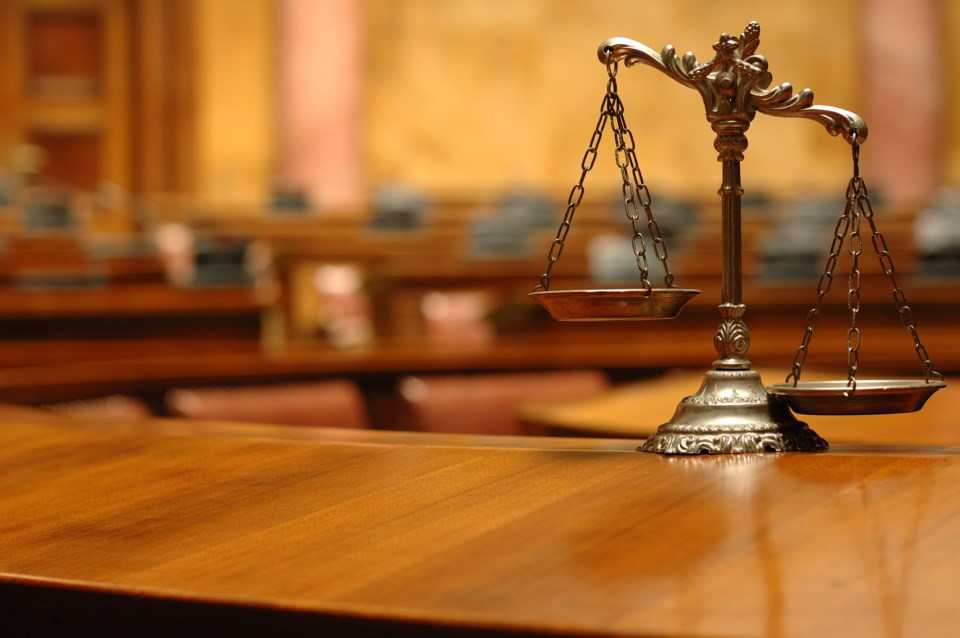



This Colab is Made To extract The winner of You case in a very easy and efficient way.
I will Use Spacy , and Key words extracted From Cases of US 



In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tager" , "ner"])

In [ ]:
from spacy.matcher import PhraseMatcher 
from spacy.matcher import Matcher
phrase_matcher = PhraseMatcher(nlp.vocab)
matcher=Matcher(nlp.vocab)
from spacy.pipeline import EntityRuler
rulerall = EntityRuler(nlp, overwrite_ents=True)

In [ ]:
Winner=["grant"]
Loser=["deny"] 
Plaintiffs=["plaintiff" , "plaintiffs"]
Defendants=["defendant" , "defendants"]

Let's Consider The text From a PDF :


For the reasons stated above .The court WILL GRANT Defendant’s motion to dismiss
Plaintiff’s claims related to claims 15–32 of the ‘044 patent and WILL DISMISS WITHOUT
PREJUDICE Count II of the amended complaint as it relates to those patent claims. The court
WILL DENY Defendant’s motion to dismiss all other claims in Plaintiff’s complaint

In [ ]:
text="For the reasons stated above . The court WILL GRANT Defendant’s motion to dismiss Plaintiff’s claims related to claims 15–32 of the ‘044 patent and WILL DISMISS WITHOUT PREJUDICE Count II of the amended complaint as it relates to those patent claims. The court WILL DENY Defendant’s motion to dismiss all other claims in Plaintiff’s complaint"

"in this part we can clean more the Text and we go through lemmatization and stemming " .
i just used (text.lower ) 

In [ ]:
text=text.lower()

In [ ]:
doc=nlp(text)

In [ ]:
def Detect_Winner(doc , Winner):
     
    winners=[]
    for  sent in doc.sents:
        for token in sent:
            if str(token) in Winner :
                winners.append(sent)
    return(winners)

In [ ]:
Detect_Winner(doc , Winner)

[the court will grant defendant’s motion to dismiss plaintiff’s claims related to claims 15–32 of the ‘044 patent and will dismiss without prejudice count ii of the amended complaint as it relates to those patent claims.]

In [ ]:
def Detect_Loser(doc):
    Loser=["deny"]   
    losers=[]
    for  sent in doc.sents:
        for token in sent:
            if str(token) in Loser :
                losers.append(sent)
    return(losers)

In [ ]:
def my_min_function(somelist):
    min_value = None
    for value in somelist:
        if not min_value:
            min_value = value
        elif value < min_value:
            min_value = value
    
    return min_value


In [ ]:
def Who_Is_The_Winner(doc , Defendants , Plaintiffs , Winner) :
    winner=Detect_Winner(doc , Winner)
    The_Winner=[]
    if (winner):
          for win in winner:
                for token in win :
                    if str(token) in Winner:
                        Starts=[]
                        Starts.append(token.i)
                        if (Starts):
                           
                            start=my_min_function(Starts)
                            Distances=[]
                            for token in win:
                              if (str(token) in Defendants):
                                distance=abs(start-token.i)
                                new=(distance , token.text , "Defendant")
                                Distances.append(new)
                              elif (str(token) in Plaintiffs):
                                     
                                        distance=abs(start-token.i)
                                        new=(distance , token.text , "Plaintiff")
                                        Distances.append(new)
                        
                                     
                              if (Distances):
    
                                a_min=min(i[0] for i in Distances)
                                for i in Distances:
                                    if i[0]==a_min:
                                        winns=i[2]
                                      
                                        The_Winner.append(winns)
                                        
                                      
          Final_List=list(set(The_Winner))
                               
                                
          if (Final_List):
                return(Final_List)
          else:
                return("None")
                            
            
    else:
            return("None")    

In [ ]:
Who_Is_The_Winner(doc , Defendants , Plaintiffs , Winner)

['Defendant']

In [ ]:
def Who_Is_The_LOSER(doc , Defendants , Plaintiffs , Loser) :
    loser=Detect_Loser(doc)

    The_loser=[]
    if (loser):
          for los in loser:
                for token in los :
                    if str(token) in Loser:
                        Starts=[]
                        Starts.append(token.i)
                        if (Starts):
                           
                            start=my_min_function(Starts)
                            Distances=[]
                            for token in los:
                              if (str(token) in Defendants):
                                distance=abs(start-token.i)
                                new=(distance , token.text , "Defendant")
                                Distances.append(new)
                              elif (str(token) in Plaintiffs):
                                     
                                        distance=abs(start-token.i)
                                        new=(distance , token.text , "Plaintiff")
                                        Distances.append(new)
                        
                                     
                              if (Distances):
    
                                a_min=min(i[0] for i in Distances)
                                for i in Distances:
                                    if i[0]==a_min:
                                        loss=i[2]
                                      
                                        The_loser.append(loss)
                                        
                                      
          Final_List=list(set(The_loser))
                               
                                
          if (Final_List):
          

                return(Final_List)
          else:
                return("None")
                            
            
    else:
            return("None")    

In [ ]:
Who_Is_The_LOSER(doc , Defendants , Plaintiffs , Loser)

['Defendant']

In [ ]:

def Formatting_Result_Loser(doc):
  String=""
  result=Who_Is_The_LOSER(doc , Defendants , Plaintiffs , Loser)
  if (result==["Defendant"]):
    String="Plaintiff"
  elif(result==["Plaintiff"]):
    String="Defendant"
  
  else:
    String="None"
  return(String)



In [ ]:

def Formatting_Result_Winner(doc):
  String=""
  result=Who_Is_The_Winner(doc , Defendants , Plaintiffs , Winner)
  if (result==["Plaintiff"]):
    String="Plaintiff"
  elif(result==["Defendant"]):
    String="Defendant"
  
  else:
    String="None"
  return(String)

In [ ]:
for sent in doc.sents:
  doc_sent=nlp(str(sent))
  print(doc)
  print(Formatting_Result_Loser(doc_sent))
  print(Formatting_Result_Winner(doc_sent))

for the reasons stated above . the court will grant defendant’s motion to dismiss plaintiff’s claims related to claims 15–32 of the ‘044 patent and will dismiss without prejudice count ii of the amended complaint as it relates to those patent claims. the court will deny defendant’s motion to dismiss all other claims in plaintiff’s complaint
None
None
for the reasons stated above . the court will grant defendant’s motion to dismiss plaintiff’s claims related to claims 15–32 of the ‘044 patent and will dismiss without prejudice count ii of the amended complaint as it relates to those patent claims. the court will deny defendant’s motion to dismiss all other claims in plaintiff’s complaint
None
Defendant
for the reasons stated above . the court will grant defendant’s motion to dismiss plaintiff’s claims related to claims 15–32 of the ‘044 patent and will dismiss without prejudice count ii of the amended complaint as it relates to those patent claims. the court will deny defendant’s motion